In [1]:
!kaggle datasets download -d datamunge/sign-language-mnist

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
100% 62.6M/62.6M [00:00<00:00, 75.3MB/s]
100% 62.6M/62.6M [00:00<00:00, 68.8MB/s]


In [2]:
!unzip /content/sign-language-mnist.zip

Archive:  /content/sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

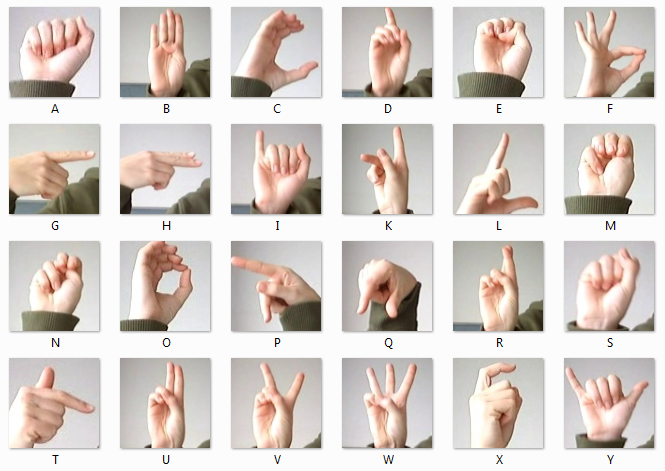

In [4]:
from IPython.display import Image
Image("/content/amer_sign2.png")

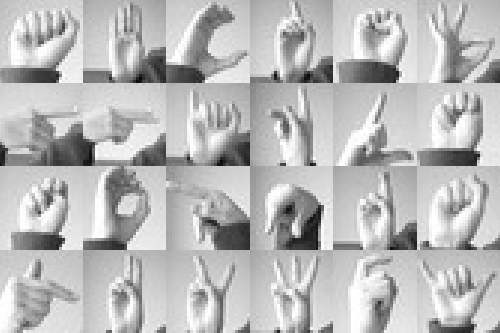

In [5]:
Image("/content/amer_sign3.png")

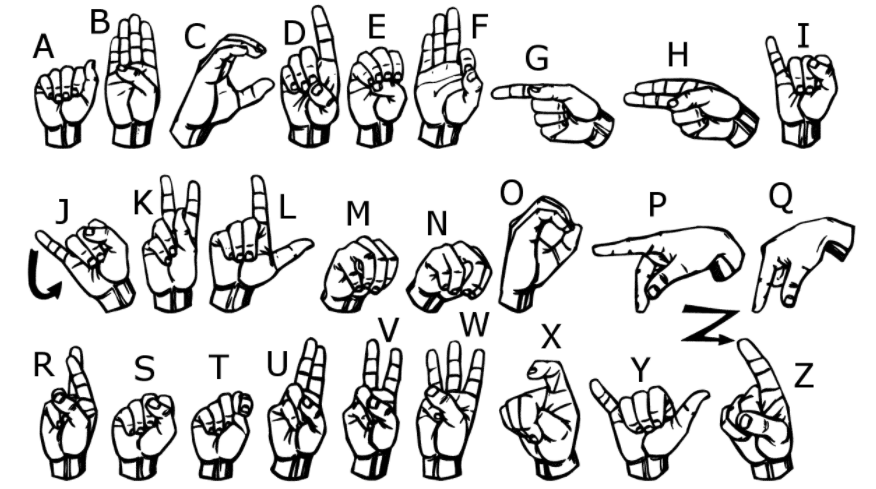

In [6]:
Image('/content/american_sign_language.PNG')

In [7]:
train = pd.read_csv("/content/sign_mnist_train.csv")
test = pd.read_csv("/content/sign_mnist_test.csv")

In [8]:
train.shape

(27455, 785)

In [9]:
train.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [10]:
test.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [11]:
labels = train['label'].values

In [12]:
unique_value = np.array(labels)
np.unique(unique_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<Axes: ylabel='count'>

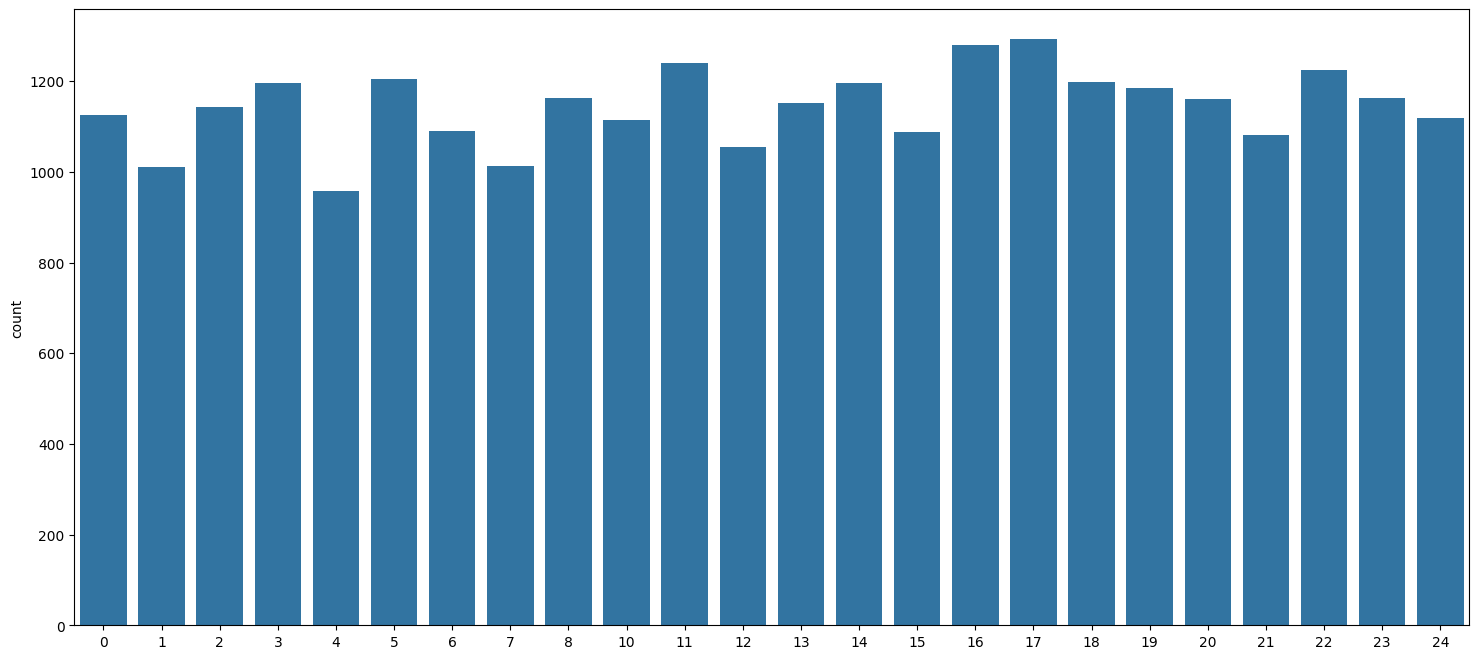

In [13]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [14]:
train.drop('label', axis = 1, inplace = True)

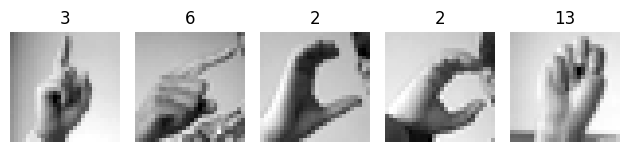

In [16]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(train.iloc[i].values.reshape(28,28), cmap = 'gray')
  plt.axis('off')
  plt.tight_layout()
  plt.title(labels[i])
plt.show()

In [18]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [19]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

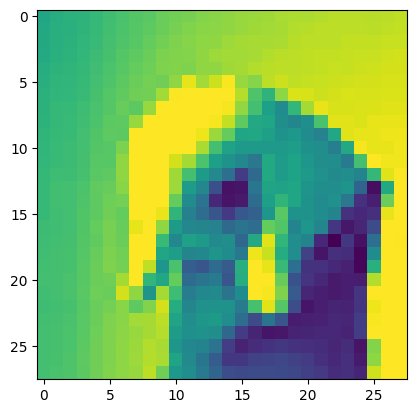

In [21]:
plt.imshow(images[5].reshape(28,28))

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 43)

In [23]:
x_train = x_train / 255
x_test = x_test / 255

In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

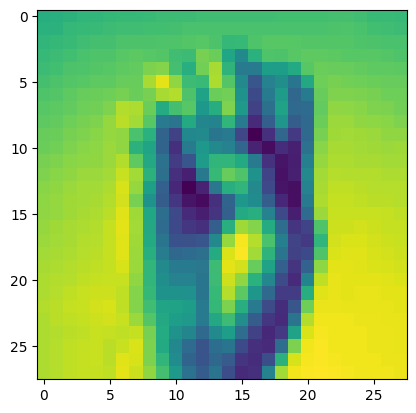

In [25]:
plt.imshow(x_train[5].reshape(28,28))

In [27]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(24, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.1592 - loss: 2.7837 - val_accuracy: 0.6449 - val_loss: 1.0351
Epoch 2/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6897 - loss: 0.9224 - val_accuracy: 0.8499 - val_loss: 0.4576
Epoch 3/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8366 - loss: 0.4771 - val_accuracy: 0.9281 - val_loss: 0.2511
Epoch 4/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9121 - loss: 0.2691 - val_accuracy: 0.9696 - val_loss: 0.1148
Epoch 5/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9473 - loss: 0.1575 - val_accuracy: 0.9783 - val_loss: 0.0784
Epoch 6/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0986 - val_accuracy: 0.9865 - val_loss: 0.0470
Epoch 7/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9771 - loss: 0.0803 - val_accuracy: 0.9985 - val_loss: 0.0185
Epoch 8/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9850 - loss: 0.0515 - val_accuracy:

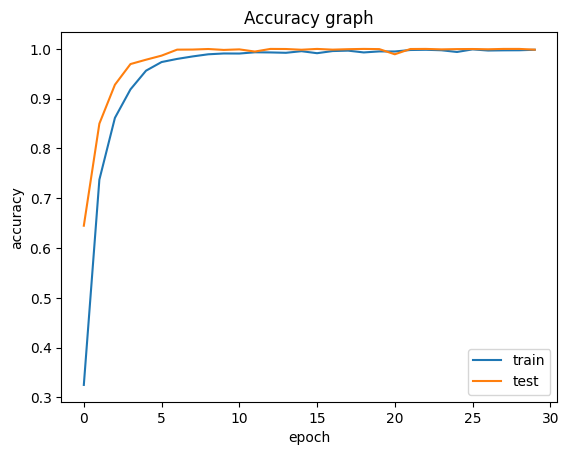

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy graph")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [34]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [35]:
y_pred = model.predict(test_images)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.862520914668154

In [43]:
y_pred = y_pred[0:500]
test_labels = test_labels[0:500]

<Axes: >

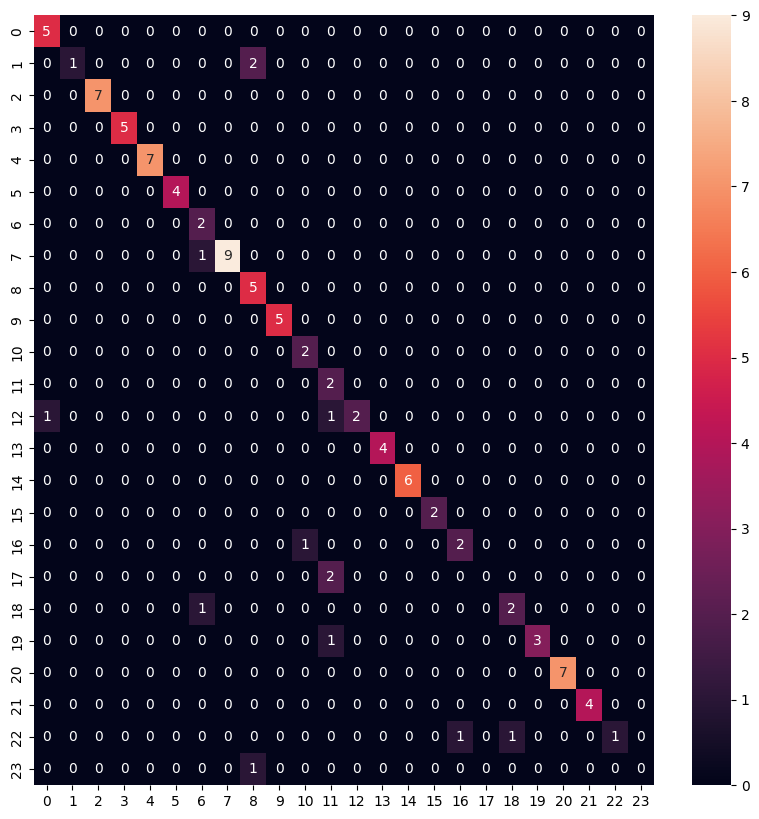

In [44]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 10))
cm = confusion_matrix(test_labels.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot=True)

In [45]:
model.save("sigh_model.keras")